<a href="https://colab.research.google.com/github/data-intelligence-for-health-lab/ai4ph-data-challenge-2024/blob/feature_plus_ffnn/Object_Detection_Based_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive on Colab

## In the following steps, we will:

1. Mount Google Drive on Colab
2. Create a directory in Google Drive from Colab
3. Copy our project data into our Google Drive folder
3. List the contents in a certain directory
4. Navigate through the Colab environment
5.  Extract files from a compressed file




In [ ]:
# 1. Mount Google Drive on Colab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



In Jupyter Notebooks, you can use shell commands with !. For example, use `!mkdir /content/drive/MyDrive/ai4ph_demo/` to create directories. This leverages the underlying operating system for quick and straightforward file operations, complementing Python’s pathlib for comprehensive filesystem management.

In [ ]:
# 2. Make directory in Google Drive from Colab

!mkdir /content/drive/MyDrive/ai4ph_demo
!mkdir /content/drive/MyDrive/ai4ph_demo/data

mkdir: cannot create directory ‘/content/drive/MyDrive/ai4ph_demo’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/ai4ph_demo/data’: File exists


In [ ]:
# 3. Copy data to our working directory
!cp /content/drive/MyDrive/'Data challenge dataset.csv' /content/drive/MyDrive/ai4ph_demo/data
!cp /content/drive/MyDrive/GSV_Images_Calgary.tar.gz /content/drive/MyDrive/ai4ph_demo/data

In [ ]:
# 4. Use the !ls command to list the contents of a directory
!ls /content/drive/MyDrive/ai4ph_demo/data/

'Data challenge dataset.csv'   GSV_Images_AB   GSV_Images_Calgary.tar.gz


`%cd`: magic command changes the current working directory for the entire notebook session, so subsequent cells will use the new directory as the working directory.

The `!cd` command only changes the directory for the duration of that cell.

---



In [ ]:
# 5. Navigate through the Colab environment
%cd /content/drive/MyDrive/ai4ph_demo/data


/content/drive/MyDrive/ai4ph_demo/data


In [ ]:
# To check current directory
!pwd

/content/drive/MyDrive/ai4ph_demo/data


In [ ]:
# After changing the working directory we don't need to type the path to working directory again.
!ls

'Data challenge dataset.csv'   GSV_Images_AB   GSV_Images_Calgary.tar.gz


In [ ]:
# Extract files from a compressed file

#Unzipping Tar compressed file.
!tar -xzvf GSV_Images_Calgary.tar.gz

In [ ]:
!ls

'Data challenge dataset.csv'   GSV_Images_AB   GSV_Images_Calgary.tar.gz


In [ ]:
!ls GSV_Images_AB/T3L2M9/


# Present Pictures in Google Colab

## In the following steps, we will:

1. Import matplotlib library
2. load and display the images with matplotlib


In [ ]:
# Importing matplotlib.pyplot
# This line imports the pyplot module from the matplotlib library, which is commonly used in Python.
# The alias plt is a convention and makes it easier to reference pyplot functions.
import matplotlib.pyplot as plt


# This line imports the Path class from the pathlib module, which
# provides an object-oriented approach to handling filesystem paths.
from pathlib import Path

t3l2m9 = list(Path('GSV_Images_AB/T3L2M9/').glob('*.png'))


`Path('GSV_Images_AB/T3L2M9/')`: This creates a Path object representing the directory GSV_Images_AB/T3L2M9/.  

`.glob('*.png')`: The glob method generates all the file paths in the directory that match the given pattern. In this case, it looks for files with a .png extension.  

`list(...)`: Converts the generator returned by glob into a list, which contains all the paths to .png files in the specified directory.

In [ ]:
from pprint import pprint # is a library to make your one-line print multiple lines
pprint(t3l2m9)

[PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_0_0.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_0_120.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_0_180.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_0_240.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_0_300.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_60_0.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_0_60.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_60_120.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_60_180.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_60_240.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_60_60.png'),
 PosixPath('GSV_Images_AB/T3L2M9/T3L2M9_60_300.png')]


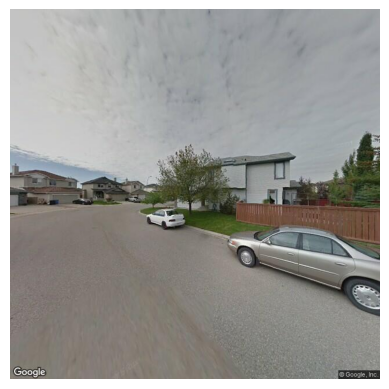

In [ ]:
from PIL import Image # pillow library

image_file = t3l2m9[3]

# Display the Image Using matplotlib
img = Image.open(image_file)
plt.imshow(img)
plt.axis('off')
plt.show()


# Step-by-Step Object Detection

In the following steps, we will:
1. Import relevant libraries (deep learning frameworks, e.g., PyTorch).
2. Load the pretrained model.
3. Load the image.
4. Transfer the image to the desired format.
5. Get the output.
6. Plot the detected objects with bounding boxes.

### Import libraries and load the model

In [ ]:
# import tensorflow
import tensorflow as tf
import tensorflow_hub as hub

# load the model from tensorflow_hub
# mobilenet is smaller model and inception_resnet is bigger model
# both models pre-trained on openimage v4.

module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]
detector = hub.load(module_handle).signatures['default']

It takes approximately 1 minute. 🍵🍵

In this long minute, we’ll briefly introduce object detection and bounding boxes!
[additional reading](https://colab.research.google.com/drive/16hLHSjlA7FRnO8Te63FQZGlZQIf-3nxM?usp=sharing)

For more information about the pre-trained model: visit [link](https://www.kaggle.com/models/google/faster-rcnn-inception-resnet-v2/tensorFlow1/faster-rcnn-openimages-v4-inception-resnet-v2/1?tfhub-redirect=true)


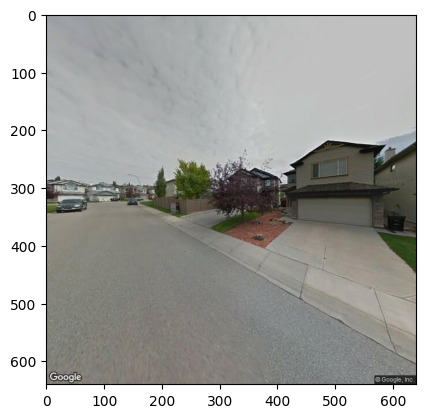

In [ ]:
from PIL import Image
# Load the image

img_path = t3l2m9[6]  # Replace with your image path
img = Image.open(img_path)
# display
plt.imshow(img)
# plt.axis('off')
plt.show()

## Understanding the data transformation

In [ ]:
import tensorflow as tf


img = tf.convert_to_tensor(img, dtype=tf.float32) # required input data type
img = tf.expand_dims(img, axis=0) # add batch dimension to make the input shape; however, the model does not support batching...
# batch, width, height, channels
img = img/255.
print(img.shape)


(1, 640, 640, 3)


In [ ]:
img[:, :3, :3, 0]

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[0.60784316, 0.60784316, 0.60784316],
        [0.60784316, 0.60784316, 0.60784316],
        [0.60784316, 0.60784316, 0.60784316]]], dtype=float32)>

In [ ]:
result = detector(img)

In [ ]:
result.keys()

dict_keys(['detection_class_labels', 'detection_class_entities', 'detection_class_names', 'detection_boxes', 'detection_scores'])

In [ ]:
result['detection_class_entities'][:10]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'House', b'Tree', b'Tree', b'Tree', b'House', b'House', b'Window',
       b'Vehicle', b'Vehicle', b'Car'], dtype=object)>

In [ ]:
result['detection_scores'][:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.8590055 , 0.8298979 , 0.812474  , 0.5988885 , 0.5266197 ,
       0.49443498, 0.37500516, 0.36236736, 0.32075176, 0.24655361],
      dtype=float32)>

In [ ]:
result.keys()

dict_keys(['detection_class_entities', 'detection_boxes', 'detection_class_names', 'detection_scores', 'detection_class_labels'])

## the output of detector

1. `detection_class_entities`: This key contains the names of the detected classes (e.g., "Person", "Car"). These are typically human-readable names that describe what the model detected in the image.

2. `detection_class_names`: This key contains similar information to detection_class_entities. It usually provides a list of strings representing the names of the detected object classes. In some models, it might be redundant or provide additional class name formats.

3. `detection_scores`: This key contains the confidence scores for each detection. The scores are typically values between 0 and 1, where a higher score indicates a higher confidence in the detection.

4. `detection_class_labels`: This key contains the numeric labels for the detected classes. These are usually integers that correspond to specific classes defined in the model's label map. For example, "Person" might be labeled as 1, "Car" as 2, etc.

5. `detection_boxes`: This key contains the bounding boxes for each detection.


## Drawing the bounding box from the detector output

In [ ]:
# Get the output from the model
# Extract the relevant information
class_entities = result['detection_class_entities'].numpy()
class_names = result['detection_class_names'].numpy()
scores = result['detection_scores'].numpy()
class_labels = result['detection_class_labels'].numpy()
boxes = result['detection_boxes'].numpy()

In [ ]:
# Filter out low-confidence detections
threshold = 0.1  # Adjust this threshold as needed


filtered_boxes = boxes[scores >= threshold]
filtered_class_entities = class_entities[scores >= threshold]
filtered_class_names = class_names[scores >= threshold]
filtered_scores = scores[scores >= threshold]
filtered_class_labels = class_labels[scores >= threshold]

# Convert the boxes to the format (xmin, ymin, xmax, ymax)
height, width, _ = img.shape[1:]
filtered_boxes = [
    [
        int(box[1] * width),
        int(box[0] * height),
        int(box[3] * width),
        int(box[2] * height)
    ]
    for box in filtered_boxes
]

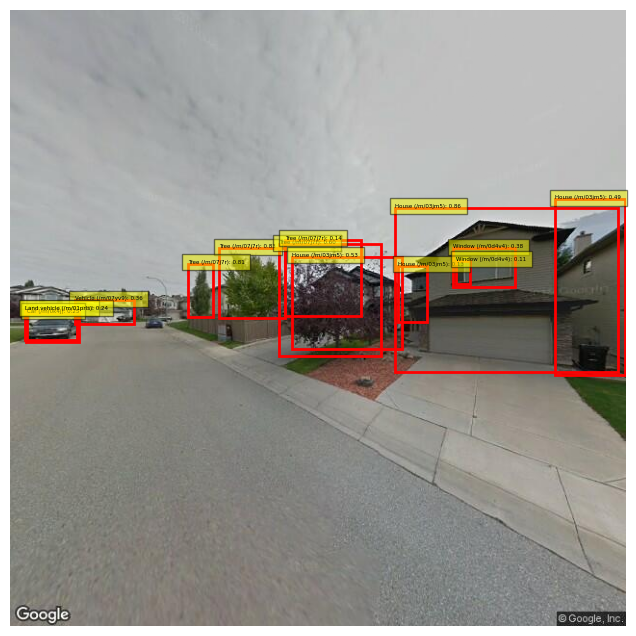

In [ ]:
# Plot the image with bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(img[0])

ax = plt.gca()
for box, class_entity, class_name, score in zip(filtered_boxes, filtered_class_entities, filtered_class_names, filtered_scores):
    xmin, ymin, xmax, ymax = box
    width, height = xmax - xmin, ymax - ymin
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

    text = f"{class_entity.decode('ascii')} ({class_name.decode('ascii')}): {score:.2f}"
    ax.text(xmin, ymin, text, fontsize=4, bbox=dict(facecolor='yellow', alpha=0.5))

plt.axis('off')
plt.show()

# Use Object Detection Algorithm to Extract Useful Features

In [ ]:
# for simplicity we modified from previous steps

def run_detector(detector, path, new_shape=(640, 640)):
    img = tf.io.read_file(path) # directly read from path , equivalent     to PIL methods
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, new_shape)
    img = tf.expand_dims(img, axis=0)
    # Run detection
    detector_output = detector(img)
    return detector_output

In [ ]:
img_path = r'/content/drive/MyDrive/ai4ph_demo/data/GSV_Images_AB/T1Y1G3/T1Y1G3_0_0.png'

In [ ]:
# with  CPU could be more than 30 sec,
# with GPU 1-3 seconds
output = run_detector(detector, img_path, new_shape=(640, 640))


In [ ]:
output.keys()

dict_keys(['detection_class_labels', 'detection_class_entities', 'detection_class_names', 'detection_boxes', 'detection_scores'])

In [ ]:
output['detection_class_entities'][:3], output['detection_scores'][:3]


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'House', b'Tree', b'Tree'], dtype=object)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.8045291 , 0.6834231 , 0.64414614], dtype=float32)>)

To extract features from six images per postal code, you have two main approaches: extracting and combining features from individual images or stitching images together and then extracting features from the combined image.

Here we demonstrate the second one, stick and extact.



In [ ]:
import cv2
import pathlib
from google.colab.patches import cv2_imshow

def stitch_images(postalcode_path: str):
    """
    Stitch images with overlapping to generate a panoramic view of the postal code.

    :param postalcode_path: A string path to the directory containing image files.
    :return: The stitched panoramic image if successful, None otherwise.
    """
    imgs = []
    path_ = pathlib.Path(postalcode_path)

    # Load all PNG images from the directory
    for img_path in path_.glob("*.png"):
        img = cv2.imread(str(img_path))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            imgs.append(img)
        else:
            print(f"Failed to load image {img_path}")

    # Check if images were loaded
    if not imgs:
        print("No images to stitch.")
        return None

    # Create a Stitcher and stitch the images
    stitcher = cv2.Stitcher.create()
    status, stitched_output = stitcher.stitch(imgs)

    if status == cv2.Stitcher_OK:
        return stitched_output
    else:
        print("Image stitching failed.")
        return None


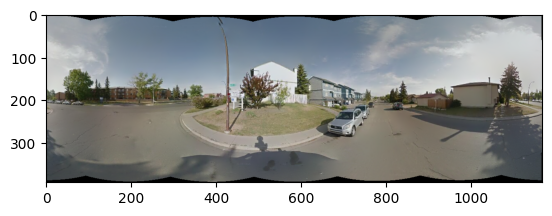

In [ ]:
# Assuming your images are in a folder named "images" under the current directory
p = r'/content/drive/MyDrive/ai4ph_demo/data/GSV_Images_AB/T2A4K9/'
resulting_image = stitch_images(p)
plt.figsize = (10, 6)
plt.imshow(resulting_image)
plt.show()

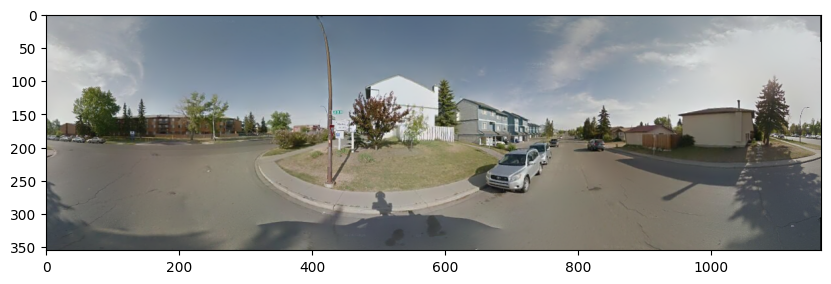

In [ ]:
h, w, _ = resulting_image.shape

# Define the crop area
crop_start = int(h * 0.05)
crop_end = int(h * 0.95)

# Apply the crop
cropped_image = resulting_image[crop_start:crop_end, :, :]
# Display the cropped image
plt.figure(figsize=(10, 6))
plt.imshow(cropped_image)
plt.show()

In [ ]:
images = []
for postal_code in list(pathlib.Path(r'/content/drive/MyDrive/ai4ph_demo/data/GSV_Images_AB').iterdir())[:5]:
    stitched = stitch_images(postal_code)
    images.append(stitched)

In [ ]:
def run_detector(detector, img):
  # Assuming 'resulting_image' is a numpy array with values between 0 and 255
  img = tf.convert_to_tensor(img, dtype=tf.uint8)  # Convert numpy array to TensorFlow tensor
  img = tf.image.convert_image_dtype(img, tf.float32)          # Convert data type from uint8 to float32
  img = tf.image.resize(img, [640, 640])                       # Resize the image
  img = tf.expand_dims(img, axis=0)                            # Add a batch dimension

  # Run detection
  detector_output = detector(img)
  return detector_output

In [ ]:
result = run_detector(detector, resulting_image)

In [ ]:
cropped_image.shape

(355, 1167, 3)

In [ ]:
def draw_bbox(result, img, threshold=0.5):
    # this is a wrap up from examples above
    # Get the output from the model
    # Extract the relevant information
    class_entities = result['detection_class_entities'].numpy()
    class_names = result['detection_class_names'].numpy()
    scores = result['detection_scores'].numpy()
    class_labels = result['detection_class_labels'].numpy()
    boxes = result['detection_boxes'].numpy()

    # Filter out low-confidence detections
    # threshold = 0.1  # Adjust this threshold as needed


    filtered_boxes = boxes[scores >= threshold]
    filtered_class_entities = class_entities[scores >= threshold]
    filtered_class_names = class_names[scores >= threshold]
    filtered_scores = scores[scores >= threshold]
    filtered_class_labels = class_labels[scores >= threshold]

    # Convert the boxes to the format (xmin, ymin, xmax, ymax)
    height, width, _ = img.shape
    filtered_boxes = [
        [
            int(box[1] * width),
            int(box[0] * height),
            int(box[3] * width),
            int(box[2] * height)
        ]
        for box in filtered_boxes
    ]

    # Plot the image with bounding boxes
    plt.figure(figsize=(12, 8))
    plt.imshow(img)

    ax = plt.gca()
    for box, class_entity, class_name, score in zip(filtered_boxes, filtered_class_entities, filtered_class_names, filtered_scores):
        xmin, ymin, xmax, ymax = box
        width, height = xmax - xmin, ymax - ymin
        rect = plt.Rectangle((xmin, ymin), width, height, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

        text = f"{class_entity.decode('ascii')} ({class_name.decode('ascii')}): {score:.2f}"
        ax.text(xmin, ymin, text, fontsize=4, bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

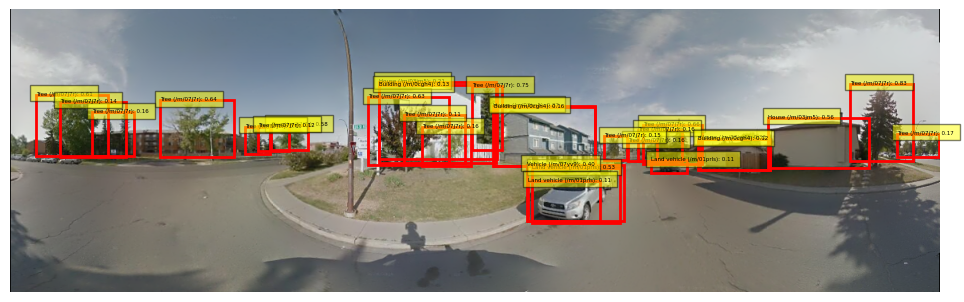

In [ ]:
draw_bbox(result, cropped_image)

# Data linkage

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import pathlib
import imutils
from PIL import Image
import os
import pathlib

In [ ]:
# Preprocessing functions from Yves, would be explained by him with details

def stich_image(img_paths: list):
    """stich images with  overlaping to  generate a panoramic view of the POstal  code

    :param img_paths: a list  of image paths
    return panoramic_image
    """
    imgs = []
    for img_path in img_paths:
        img = cv2.imread(img_path)
        imgs.append(img)
    stitchy = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
    (dummy, stiched_output) = stitchy.stitch(imgs)
    if dummy == cv2.STITCHER_OK:
        return stiched_output
    else:
        # Handle different types of errors
        if dummy == cv2.STITCHER_ERR_NEED_MORE_IMGS:
            print("Error: Need more images to perform stitching.")
        elif dummy == cv2.STITCHER_ERR_HOMOGRAPHY_EST_FAIL:
            print("Error: Homography estimation failed.")
        elif dummy == cv2.STITCHER_ERR_CAMERA_PARAMS_ADJUST_FAIL:
            print("Error: Camera parameters adjustment failed.")
        else:
            print(f"Error: Stitching failed with status code {dummy}")
        return None


def crop(stitched: np.array):
    """crop stiched image

    :param image: Image to resize
    :param dimension:  Expected (width, height) of new image, defaults to (800,250)
    :Returns image: Resized image
    """
    stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10,
			cv2.BORDER_CONSTANT, (0, 0, 0))
    # convert the stitched image to grayscale and threshold it
    # such that all pixels greater than zero are set to 255
    # (foreground) while all others remain 0 (background)
    gray = cv2.cvtColor(stitched,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
	# find all external contours in the threshold image then find
	# the *largest* contour which will be the contour/outline of
	# the stitched image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
	# allocate memory for the mask which will contain the
	# rectangular bounding box of the stitched image region
    mask = np.zeros(thresh.shape, dtype="uint8")
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
    minRect = mask.copy()
    sub = mask.copy()
	# keep looping until there are no non-zero pixels left in the
	# subtracted image
    while cv2.countNonZero(sub) > 0:
		# erode the minimum rectangular mask and then subtract
		# the thresholded image from the minimum rectangular mask
		# so we can count if there are any non-zero pixels left
        minRect = cv2.erode(minRect, None)
        sub = cv2.subtract(minRect, thresh)
    cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
	# use the bounding box coordinates to extract the our final
	# stitched image
    stitched = stitched[y:y + h, x:x + w]
    return stitched

def generate_panorama(root_folder):
    """
    """
    postal_codes = os.listdir(root_folder)
    for index, postal_code in tqdm(enumerate(postal_codes), total=1000):
        print(f"**** starting processing postal  code {postal_code} images")
        image_list=[]
        image_path = os.path.join(root_folder,
                                postal_codes[index])

        try:
            for images in os.listdir(image_path):
                # Selecting only horizontal images remove +'_0' to  use all  12 images,  but this might not work  for all images
                if (images.endswith(".png") and images.startswith(postal_code+'_0')):
                    image_list.append(os.path.join(image_path,
                                                images))
            panorama_view = stich_image(image_list)
            panorama_view_cropped = crop(panorama_view)
            cv2.imwrite(os.path.join(image_path,
                        "pano_view.png"), panorama_view_cropped)
            print(f"*** processing postal code {postal_code} images done ")
        except Exception as e:
            print(f"stiching of Images of postal code:{postal_code} failed, causes:{e}")


## The next line generates the panorama and saves the image to the corresponding zip code folder.

In [ ]:
# approx. 45 mins 🍵🍵🍵
generate_panorama(r'/content/drive/MyDrive/ai4ph_demo/data/GSV_Images_AB')

## Here we started to extract features from the panorama images

In [ ]:
# define the output we want

result = {
    'id': [],
    'Postal_code': [],
    'class': [],
    'score': [],
    'bbox': [],
}

In [ ]:
!mkdir /content/drive/MyDrive/ai4ph_demo/data/intermediate

mkdir: cannot create directory ‘/content/drive/MyDrive/ai4ph_demo/data/intermediate’: File exists


In [1402]:
def run_detector(detector, path):
    # Read the image file from the given path
    img = tf.io.read_file(path)  # This reads the image file directly from the path, similar to PIL methods

    # Decode the image to get a 3-channel (RGB) image
    img = tf.image.decode_image(img, channels=3)

    # Convert the image to float32 data type
    img = tf.image.convert_image_dtype(img, tf.float32)

    # Optionally, resize the image if needed (uncomment the next line if resizing is required)
    # img = tf.image.resize(img) # The model takes variable sizes, so resizing might not be necessary

    # Add a batch dimension to the image tensor
    img = tf.expand_dims(img, axis=0)

    # Run the detection model on the image
    detector_output = detector(img)

    return detector_output


In [1403]:
# Import necessary libraries
import pickle
from tqdm.notebook import tqdm
import pathlib
import tensorflow as tf

# Initialize tqdm for pandas library
tqdm.pandas()

def preprocess(load_path: str = r'/content/drive/MyDrive/ai4ph_demo/data/GSV_Images_AB',
               save_path: str = r'/content/drive/MyDrive/ai4ph_demo/data/intermediate/'):
    # Convert load_path to a pathlib.Path object for easier manipulation
    total = pathlib.Path(load_path)  # Adjust path as necessary

    # Initialize a dictionary to store the results
    result = {'id': [], 'Postal_code': [], 'class': [], 'score': [], 'bbox': []}

    # Loop through each item in the directory specified by load_path
    for idx, folder_path in tqdm(enumerate(total.iterdir()), total=1_000):
        if folder_path.is_dir():
            # Extract postal code from the folder name
            postal_code = folder_path.stem

            # Check if the panorama view image exists in the folder
            if list(folder_path.glob('pano_view.png')):
                # Get the path to the panorama view image
                panorama_view_path = next(folder_path.glob('pano_view.png'))

                # Run the detector on the image
                detector_output = run_detector(detector, str(panorama_view_path))

                # Extract detected classes, bounding boxes, and scores
                detected_classes = detector_output['detection_class_entities'].numpy()
                detected_boxes = detector_output['detection_boxes'].numpy()
                detected_scores = detector_output['detection_scores'].numpy()

                # Append the results to the respective lists in the result dictionary
                result['id'].append(idx)
                result['Postal_code'].append(postal_code)
                result['class'].append(detected_classes)
                result['score'].append(detected_scores)
                result['bbox'].append(detected_boxes)
            else:
                print(f"Stitching failed for {postal_code}.")
        else:
            print(f"{folder_path} is not a directory.")

        # Save progress at regular intervals
        if (idx + 1) % 400 == 0:
            with open(f"{save_path}/save_at_{idx+1}.pkl", 'wb') as f:
                pickle.dump(result, f)

    # Save the final results using pickle
    with open(f"{save_path}/detection_results.pkl", 'wb') as f:
        pickle.dump(result, f)

    print("Task finished and results saved!")

# Ensure the detector is defined before running this function
# detector = <your_detector_function>


In [ ]:
images_folder = r'/content/drive/MyDrive/ai4ph_demo/data/GSV_Images_AB'
result_folder = r'/content/drive/MyDrive/ai4ph_demo/data/intermediate'

In [ ]:
preprocess(images_folder, result_folder)

  0%|          | 0/1000 [00:00<?, ?it/s]

Stitching failed for T2K1J7.
Stitching failed for T2E2A5.
Stitching failed for T2H2Z8.
Stitching failed for T3B3Y4.
Stitching failed for T2M3K9.


## Now all the features are extracted from the image, next time you can actually start from here.

In [ ]:
# import pickle
# import pandas as pd
# import numpy as np

with open(r'/content/drive/MyDrive/ai4ph_demo/data/intermediate/detection_results.pkl', 'rb') as f:
  results = pickle.load(f)

## Using Pandas DataFrame to store extracted features

pandas: pandas is a powerful and flexible open-source data manipulation and analysis library for Python. It provides data structures and functions needed to manipulate structured data seamlessly. pandas is well-suited for working with large datasets and is often used in data science, data analysis, and machine learning projects.

In [ ]:
result_df = pd.DataFrame(results)

In [ ]:
result_df.head()

,id,Postal_code,class,score,bbox
0,0,T2Y3M2,"[b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', ...","[0.83194846, 0.8185307, 0.79531324, 0.79239434...","[[0.31701425, 0.17122377, 0.56470716, 0.208758..."
1,1,T3B4G9,"[b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', ...","[0.94217914, 0.91975844, 0.8064674, 0.75276273...","[[0.13542023, 0.08211152, 0.6015564, 0.1632604..."
2,2,T3L2Y6,"[b'Tree', b'House', b'House', b'Tree', b'Tree'...","[0.85866374, 0.83518255, 0.73314637, 0.7243698...","[[0.39959428, 0.76895475, 0.5771442, 0.8055337..."
3,3,T2E2B5,"[b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', ...","[0.8951859, 0.86667573, 0.7806027, 0.64905816,...","[[0.022606583, 0.0067374315, 0.6458656, 0.1586..."
4,4,T2S3C6,"[b'Tree', b'Tree', b'Building', b'Tree', b'Bui...","[0.86469233, 0.8395548, 0.67702365, 0.6525054,...","[[0.122291036, 0.20191218, 0.516615, 0.3464912..."


In [ ]:
# to_csv: to CSV file.
# to_excel: to Excel file.
# to_json: to JSON file.
# to_html: to HTML file.
# to_sql: to SQL database table.
# to_pickle: to pickle file.
# to_parquet: to Parquet file.

result_df.to_csv(r'/content/drive/MyDrive/ai4ph_demo/data/intermediate/od_features.csv', index=False)

In [ ]:
# after we saved our file, we can use following command to load it
# if you start your colab session from here, you might need to run following code in comment
# import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv(r'/content/drive/MyDrive/ai4ph_demo/data/Data challenge dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,POSTALCODE_15,COMM_NAME_15,DA,SCOREMAT,SCORESOC
0,0,T2W0B8,CALGARY,48061325,-0.016250,0.057812
1,1,T2E8H6,CALGARY,48060938,0.024223,-0.000923
2,2,T3L2M9,CALGARY,48061809,-0.042096,-0.042879
3,3,T1Y4L8,CALGARY,48061122,0.071819,-0.051670
4,4,T1Y1G3,CALGARY,48061491,0.076697,-0.046250


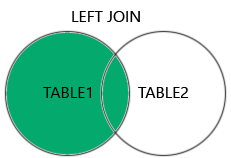

Left Join
A left join operation combines two lists (or tables) based on a common column. It keeps all entries from the first table (Table 1), even if there are no matching entries in the second table (Table 2). If there are no matches in Table 2, the result will have blanks (or NULLs) for those columns. So, Table 1 is the primary table, and all its entries are retained in the final result.

In [ ]:
# merge function join two tables with their unqiue id, in our case it's 'postal code'.
# how='left': left join
# left: left table (in example table1)
# right: right table (in example table2)
merged = pd.merge(left=result_df, right=df, left_on='Postal_code', right_on='POSTALCODE_15', how='left')

In [ ]:
merged.shape

(995, 11)

In [ ]:
merged.head(3)

,id,Postal_code,class,score,bbox,Unnamed: 0,POSTALCODE_15,COMM_NAME_15,DA,SCOREMAT,SCORESOC
0,0,T2Y3M2,"[b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', ...","[0.83194846, 0.8185307, 0.79531324, 0.79239434...","[[0.31701425, 0.17122377, 0.56470716, 0.208758...",650,T2Y3M2,CALGARY,48062069,-0.001421,-0.020597
1,1,T3B4G9,"[b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', ...","[0.94217914, 0.91975844, 0.8064674, 0.75276273...","[[0.13542023, 0.08211152, 0.6015564, 0.1632604...",222,T3B4G9,CALGARY,48060209,-0.008136,-0.010417
2,2,T3L2Y6,"[b'Tree', b'House', b'House', b'Tree', b'Tree'...","[0.85866374, 0.83518255, 0.73314637, 0.7243698...","[[0.39959428, 0.76895475, 0.5771442, 0.8055337...",472,T3L2Y6,CALGARY,48062247,-0.040409,-0.042415


# Supervised Machine Learning Pipeline


1. **Feature representation:** Use numbers to represent our extract objects and any other possible features
4. **Train-test split:** Divide the data into training and testing sets.
5. **Hyperparameter tuning:** Optimize the model parameters.
6. **Model evaluation:** Assess the model's performance.
7. **Model explanation:** Interpret and explain the model's results.

## Feature representation:

First, we need to filter the useful features based on the bounding box (bbox) score. A high bounding box score indicates that our object detector is highly confident in the presence of the object, while a low score indicates low confidence. There is no universal standard threshold for determining the score level; it depends on the specific application and context.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [1425]:
all_scores = merged.score.to_numpy()
all_classes = merged['class'].to_numpy()
all_boxes = merged['bbox'].to_numpy()
all_scores = np.vstack(all_scores).reshape(merged.shape[0], 100)
all_classes = np.vstack(all_classes).reshape(merged.shape[0], 100)
all_boxes = np.vstack(all_boxes).reshape(merged.shape[0],  100, 4)

# we just start with a smaller threshold, and feel free to explore it
threshold = 0.15
r = all_scores > threshold

filtered_scores = np.where(r, all_scores, 0)
filtered_features = np.where(r, all_classes, np.nan)
filtered_boxes = np.where(np.expand_dims(r, axis=-1), all_boxes, np.nan,)


In [1462]:
merged['filtered_classes'] = [filtered_features[i] for i in range(filtered_features.shape[0])]
merged['filtered_scores'] = [filtered_scores[i] for i in range(filtered_scores.shape[0])]
merged['filtered_bbox'] = [filtered_boxes[i] for i in range(filtered_boxes.shape[0])]

In [1463]:
merged['filtered_classes'].iloc[0]

array([b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'House',
       b'House', b'Street light', b'House', b'Tree', b'Car', b'Car',
       b'Tree', b'Tree', b'Person', b'Tree', b'Tree', b'Tree', b'Tree',
       b'Car', b'House', b'House', b'Tree', b'House', b'Tree',
       b'Land vehicle', b'House', b'Land vehicle', b'House', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=object)

In [1464]:
from tqdm import tqdm
tqdm.pandas()

# Apply a function to 'filtered_classes' column using tqdm for progress tracking
# The function iterates over each element in the list 'x'
# If an element is a byte string, it decodes it to a UTF-8 string
merged['filtered_classes'] = merged['filtered_classes'].progress_apply(
    lambda x: [bstr.decode('utf-8') for bstr in x if isinstance(bstr, bytes)]
)


100%|██████████| 995/995 [00:00<00:00, 45878.44it/s]


In [1429]:
", ".join(merged['filtered_classes'].iloc[0])

'Tree, Tree, Tree, Tree, Tree, Tree, House, House, Street light, House, Tree, Car, Car, Tree, Tree, Person, Tree, Tree, Tree, Tree, Car, House, House, Tree, House, Tree, Land vehicle, House, Land vehicle, House'

In [1444]:
class CategoryEncoder:
    def __init__(self):
        self.class_to_index = {'no object': 0}  # Dictionary to map class names to indices
        self.index_to_class = {0: 'no object'}  # Dictionary to map indices to class names
        self.current_index = 1  # Index counter for new classes

    def register_class(self, class_name):
        """Register a new class in the encoder."""
        if class_name not in self.class_to_index:
            self.class_to_index[class_name] = self.current_index
            self.index_to_class[self.current_index] = class_name
            self.current_index += 1  # Increment index counter

class DocumentTermMatrix:
    def __init__(self, dataframe, count_freq=False):
        # Convert the 'filtered_classes' column to a list of documents (each document is a list of classes)
        self.documents = dataframe['filtered_classes'].tolist()
        self.encoder = CategoryEncoder()  # Initialize the category encoder
        self._encode_classes()  # Encode all classes in the documents
        self.matrix = self._create_matrix(count_freq)  # Create the document-term matrix
        self.labels_1 = dataframe['SCOREMAT'].to_numpy()  # Convert 'SCOREMAT' column to a numpy array
        self.labels_2 = dataframe['SCORESOC'].to_numpy()  # Convert 'SCORESOC' column to a numpy array

    def _encode_classes(self):
        """Encode all classes in the documents using the category encoder."""
        for document in self.documents:
            for class_name in document:
                self.encoder.register_class(class_name)  # Register each class in the encoder

    def _create_matrix(self, count_freq=False):
        """Create a document-term matrix where rows are documents and columns are class frequencies."""
        # Initialize a matrix of zeros with shape (number of documents, number of unique classes)
        matrix = np.zeros((len(self.documents), len(self.encoder.class_to_index)))

        # Fill in the matrix
        for i, document in enumerate(self.documents):
            for class_name in document:
                if count_freq:
                    matrix[i, self.encoder.class_to_index[class_name]] += 1  # Increment count if counting frequencies
                else:
                    matrix[i, self.encoder.class_to_index[class_name]] = 1  # Set to 1 for binary presence

        return matrix

    def create_pos_matrix(self, max_len=30):
        """Create a position matrix with a fixed length for each document."""
        matrx = []
        for i, document in enumerate(self.documents):
            r = []
            for class_name in document:
                r.append(self.encoder.class_to_index[class_name])  # Append class indices to the row
            if len(r) < max_len:
                r.extend([0] * (max_len - len(r)))  # Pad with zeros if the document is shorter than max_len
            else:
                r = r[:max_len]  # Truncate if the document is longer than max_len

            matrx.append(r)
        return np.array(matrx)  # Convert list of lists to a numpy array

In [1431]:
doc = DocumentTermMatrix(merged, True)

In [1432]:
doc.matrix

array([[ 0., 15.,  8., ...,  0.,  0.,  0.],
       [ 0., 16.,  1., ...,  0.,  0.,  0.],
       [ 0., 11., 12., ...,  0.,  0.,  0.],
       ...,
       [ 0., 21.,  0., ...,  0.,  0.,  0.],
       [ 0., 13.,  4., ...,  0.,  0.,  0.],
       [ 0., 14.,  5., ...,  0.,  0.,  0.]])

In [1433]:
doc.matrix.shape

(995, 42)

In [1434]:
doc.labels_1[:3]

array([-0.00142119, -0.00813578, -0.04040872])

In [1435]:
doc.labels_2[:3]

array([-0.02059659, -0.01041693, -0.04241482])

In [1447]:
(list(doc.encoder.class_to_index.keys()))[:3]

['no object', 'Tree', 'House']

## Train test split

In [1448]:
doc.matrix.shape

(995, 42)

In [1449]:

# Set random seed for reproducibility
np.random.seed(0)

# Randomly sample 80% of the indices for training set
train_indices = np.random.choice(doc.matrix.shape[0], int(doc.matrix.shape[0] * 0.8), replace=False)

# Create training set using the sampled indices
X_train = doc.matrix[train_indices]
y_train = doc.labels_1[train_indices] * 100  # Scale the labels as needed

# Create test set by removing the training indices from the full dataset
X_test = np.delete(doc.matrix, train_indices, axis=0)
y_test = np.delete(doc.labels_1, train_indices, axis=0) * 100  # Scale the labels as needed


In [1450]:
# with existing library, you can simply do it with:
# X_train, X_test, y_train, y_test = train_test_split(doc.matrix, doc.labels_1, test_size=0.2, random_state=42)


## Model training

XGBoost is a powerful and efficient implementation of gradient boosting algorithms. It is widely used for its performance and speed. In this example, we will use XGBoost's XGBRegressor to predict our target scores.



In [1451]:
from xgboost import XGBRegressor


# Initialize the XGBRegressor with specified hyperparameters
xgbr = XGBRegressor(
    n_estimators=300,            # Number of boosting rounds (trees) to be built
    learning_rate=0.01,          # Step size shrinkage used to prevent overfitting (learning rate)
    max_depth=6,                 # Maximum depth of each tree (usually between 3 and 12)
    min_child_weight=2,          # Minimum sum of instance weight needed in a child (usually between 1 and 10)
    subsample=0.9,               # Fraction of samples used for each boosting round (usually between 0.5 and 1)
    colsample_bytree=0.3,        # Fraction of features used for each boosting round (usually between 0.3 and 1)
    random_state=42,             # Seed for reproducibility
)


# Fit the XGBRegressor model to the training data
xgbr.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = xgbr.predict(X_test)

# Calculate the Mean Squared Error (MSE) between the actual and predicted values
mse = mean_squared_error(y_test, y_pred)


print(f'SCORESOC: XGBRegressor Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'SCORESOC: XGBRegressor R²: {r2}')


dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)
dummy_pred = dummy_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, dummy_pred)
baseline_r2 = r2_score(y_test, dummy_pred)

print(f'SCORESOC: Baseline Mean Squared Error: {baseline_mse}')
print(f'SCORESOC: Baseline R²: {baseline_r2}')

SCORESOC: XGBRegressor Mean Squared Error: 17.174792597981963
SCORESOC: XGBRegressor R²: 0.1120741942430793
SCORESOC: Baseline Mean Squared Error: 19.393027457383614
SCORESOC: Baseline R²: -0.0026071309406514587


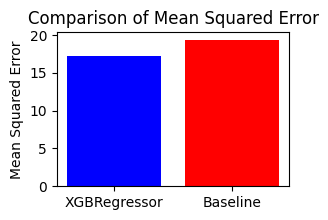

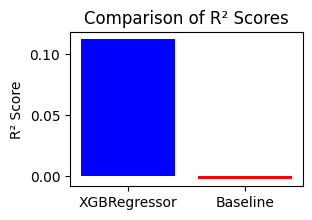

In [1452]:
# Bar Plot of Mean Squared Error (MSE)
plt.figure(figsize=(3, 2))
models = ['XGBRegressor', 'Baseline']
mse_values = [mse, baseline_mse]
plt.bar(models, mse_values, color=['blue', 'red'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.show()

# Bar Plot of R² Scores
plt.figure(figsize=(3, 2))
r2_values = [r2, baseline_r2]
plt.bar(models, r2_values, color=['blue', 'red'])
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores')
plt.show()


## Model explanation

In [1453]:
importances = xgbr.feature_importances_
feature_names = [doc.encoder.index_to_class[i] for i in range(len(importances))]

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)



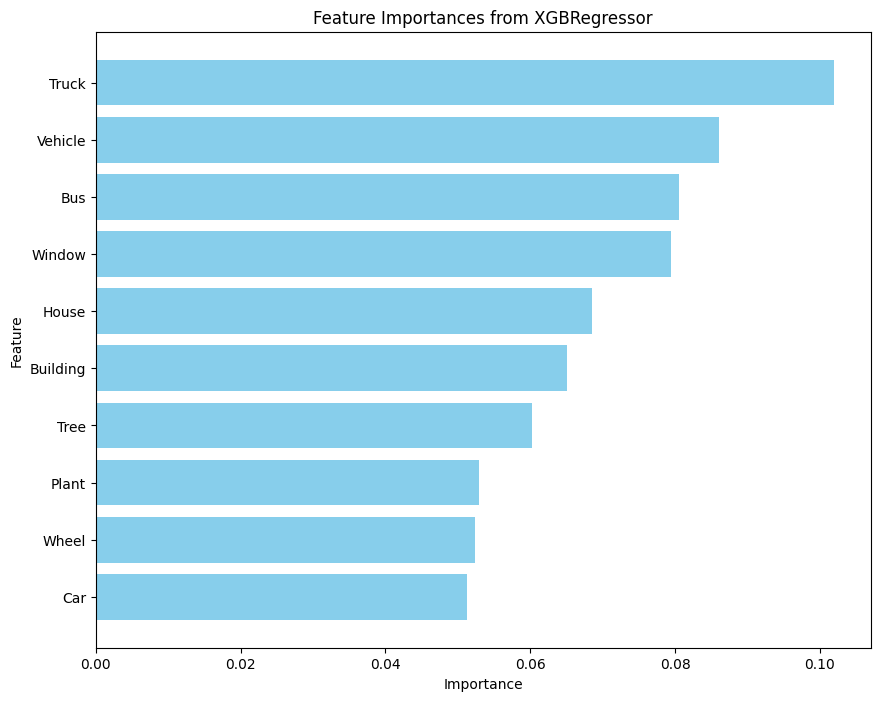

In [1456]:
plt.figure(figsize=(10, 8))
topn = 10
top_features = feature_importances.head(topn)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from XGBRegressor')
plt.gca().invert_yaxis()
plt.show()

We can also use existing library.
SHAP (SHapley Additive exPlanations) is a framework used to interpret the output of machine learning models. It provides a unified approach to explain the predictions of any machine learning model by attributing each feature's contribution to the prediction.

it offeres several types of plots, such as
1) summary plot
2) dependence plot
3) heatmap plot

For more :
https://shap-lrjball.readthedocs.io/en/latest/examples.html#plots-examples

In [ ]:
!pip install shap -q
# or we can use existing shap library to do the task
import shap
explainer = shap.Explainer(xgbr)
shap_values = explainer(X_test)

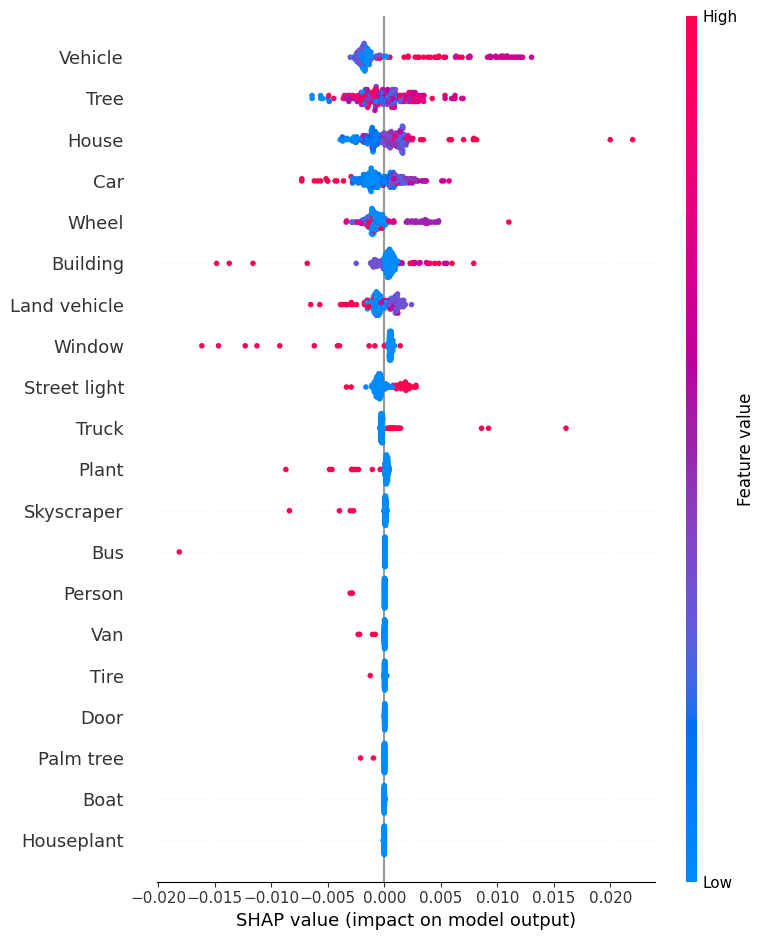

In [ ]:
# Summary beeswarm plot
shap.summary_plot(shap_values, X_test, list(doc.encoder.class_to_index.keys()))


# Neural Network Based Method (OPTIONAL)
In addition to extracted objects, we have object detection scores and bounding boxes that can be used as features. However, manual feature engineering can be labor-intensive and time-consuming. Instead, we can consider building a neural network to automatically learn patterns from these available features.

This approach is optional because neural network-based methods sacrifice explainability, which is not the primary objective of our feature-based prediction. For neural network-based predictions, we can bypass the object detection part and directly use the images as input to train the model for our prediction purposes.

Despite the trade-off in explainability, this method offers significant benefits. We can avoid the manual work involved in feature extraction, such as calculating bounding box area, aspect ratio, etc. Feeding the neural network with flattened bounding box data should enable effective training, provided we have enough data.


In [ ]:
merged.filtered_classes.iloc[2]

In [1459]:
# Define the maximum number of objects to keep
max_object_count = 27

# Keep only the first 27 objects in 'filtered_scores' and 'filtered_bbox'
merged['filtered_scores'] = merged['filtered_scores'].apply(lambda x: x[:max_object_count])
merged['filtered_bbox'] = merged['filtered_bbox'].apply(lambda x: x[:max_object_count])


In [1031]:

# Replace NaN values with 0 in 'filtered_bbox' and store the result in 'bbox_padded'
merged['bbox_padded'] = merged['filtered_bbox'].apply(lambda x: np.nan_to_num(x, nan=0))

# Replace NaN values with 0 in 'filtered_scores' and store the result in 'score_padded'
merged['score_padded'] = merged['filtered_scores'].apply(lambda x: np.nan_to_num(x, nan=0))


In [1032]:
merged['filtered_classes'].iloc[1]

array([b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree', b'Tree',
       b'Tree', b'Tree', b'Tree', b'Car', b'Tree', b'House', b'Tree',
       b'Land vehicle', b'Vehicle', b'Tree', b'Tree', b'Tree', b'Boat',
       b'Tree', nan, nan, nan, nan, nan, nan], dtype=object)

In [ ]:
# Initialize the DocumentTermMatrix with the 'merged' dataframe and count frequencies
doc = DocumentTermMatrix(merged, True)

# Create a position matrix with a fixed length of 'max_object_count'
obj_matrix = doc.create_pos_matrix(max_object_count)


In [ ]:
obj_matrix.shape

In [1036]:
bbox_padded_np = merged['bbox_padded'].apply(np.ravel).to_numpy()
flatterned_bbox = np.vstack(bbox_padded_np)
flatterned_bbox.shape

(995, 108)

In [1037]:
score_padded_np = merged['score_padded'].to_numpy()
stacked_score = np.vstack(score_padded_np)

In [782]:
# scaler1 = MinMaxScaler()
# object_features = scaler1.fit_transform(obj_matrix)

scaler2 = MinMaxScaler()
box_feature = scaler2.fit_transform(flatterned_bbox)

scaler3 = MinMaxScaler()
score_feature = scaler3.fit_transform(stacked_score)

In [1039]:
obj_matrix.shape, box_feature.shape, score_feature.shape


((995, 27), (995, 108), (995, 27))

In [1043]:
object_features.shape, box_feature.shape, score_feature.shape

(torch.Size([995, 27]), torch.Size([995, 108]), torch.Size([995, 27]))

In [1046]:
X = np.concatenate([
    object_features,
    box_feature,
    score_feature
    ], axis=1)

y = doc.labels_2

In [1118]:
X.shape

torch.Size([995, 162])

In [1047]:
# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1048]:
X_train.shape, y_train.shape

(torch.Size([796, 162]), torch.Size([796, 1]))

In [786]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [1049]:
# Define a PyTorch Dataset
class CustomDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create Dataset and DataLoader
# Create training and testing Dataset and DataLoader
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True) # since our demonstration data is small we use bigger batch
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


Explanation:


**Embedding Layer:** Used for transforming categorical variables (object features) into a dense vector representation.  
**Fully Connected Layers (FC):** Layers that connect every input to every output, commonly used for feature transformation.  
**Batch Normalization:** Helps to stabilize and speed up the training by normalizing the output of the previous layers.  
**ReLU Activation:** Applies the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity.   
**Dropout:** Regularization technique to prevent overfitting by randomly setting a fraction of input units to zero during training.   
**Weight Initialization:** Custom weight initialization to improve training convergence.

In [1399]:
# Function to initialize weights of the linear layers
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')  # Initialize weights with Kaiming uniform distribution
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)  # Initialize biases with zero

# Define the neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, embed_dim=32, object_dim=27, bbox_dim=108, score_dim=27, hidden_dim=64, output_dim=1):
        super(NeuralNetwork, self).__init__()

        # Embedding layer for object features (e.g., categorical data)
        self.object_embedding = nn.Embedding(40, embed_dim)  # Embedding layer with 40 categories and embedding dimension of 32

        # Fully connected layers for different feature sets
        self.object_fc = nn.Linear(object_dim, hidden_dim)  # Linear layer for object features
        self.bbox_fc = nn.Linear(bbox_dim, hidden_dim)  # Linear layer for bounding box features
        self.score_fc = nn.Linear(score_dim, hidden_dim)  # Linear layer for score features

        # Interaction layer combining embedded and other features
        self.interaction_fc = nn.Linear(embed_dim * 27 + hidden_dim * 2, hidden_dim)  # Linear layer for combined features

        # Additional fully connected layers for further processing
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)  # First fully connected layer after interaction
        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Output layer

        # Batch normalization layers to stabilize learning
        self.bn1 = nn.BatchNorm1d(hidden_dim)  # Batch normalization for bounding box features
        self.bn2 = nn.BatchNorm1d(hidden_dim)  # Batch normalization for score features
        self.bn3 = nn.BatchNorm1d(hidden_dim)  # Batch normalization after interaction layer

        # Activation and dropout layers
        self.relu = nn.ReLU()  # ReLU activation function
        self.dropout = nn.Dropout(0.5)  # Dropout layer with 50% dropout rate for regularization

        # Initialize the weights of the layers using the defined function
        self.apply(initialize_weights)

    # Define the forward pass of the network
    def forward(self, object_features, bbox_features, score_features):
        # Embed the object features and flatten the output
        object_embedded = self.object_embedding(object_features)
        object_hidden = object_embedded.view(object_embedded.size(0), -1)  # Flatten the embedding output

        # Process bounding box features through fully connected layer, batch norm, and ReLU
        bbox_hidden = self.relu(self.bn1(self.bbox_fc(bbox_features)))

        # Process score features through fully connected layer, batch norm, and ReLU
        score_hidden = self.relu(self.bn2(self.score_fc(score_features)))

        # Combine the processed features
        combined = torch.cat([object_hidden, bbox_hidden, score_hidden], dim=1)  # Concatenate along the feature dimension

        # Pass the combined features through the interaction layer, batch norm, and ReLU
        interaction = self.relu(self.bn3(self.interaction_fc(combined)))
        interaction = self.dropout(interaction)  # Apply dropout for regularization

        # Pass through additional fully connected layers with dropout and ReLU
        x = self.relu(self.fc1(interaction))
        x = self.dropout(x)

        # Output layer
        output = self.fc2(x)

        return output

In [1400]:
# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=.001)


In [1401]:
# Train the model
losses = []
num_epochs = 200
for epoch in tqdm(range(num_epochs)):
    # for i, (X_train_batch, y_train_batch) in enumerate(train_loader):
    # training mode
    model.train()
    optimizer.zero_grad()
    X_train_batch, y_train_batch = X_train, y_train
    object_features = X_train_batch[:, :27].long()
    bbox_features = X_train_batch[:, 27:27+108]
    score_features = X_train_batch[:, -27:]

    outputs = model(object_features, bbox_features, score_features)  # Forward pass

    loss = criterion(outputs, y_train_batch)

    # Backward pass and optimize
    loss.backward() # get the gradiant dL/dw, dL/db for each layer
    optimizer.step() # update w -= lr*gradient

    losses.append(loss.item())

    if (i + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], step [{i+1}/{len(train_loader)}] Loss: {loss.item():.4f}')


100%|██████████| 200/200 [00:05<00:00, 36.47it/s]


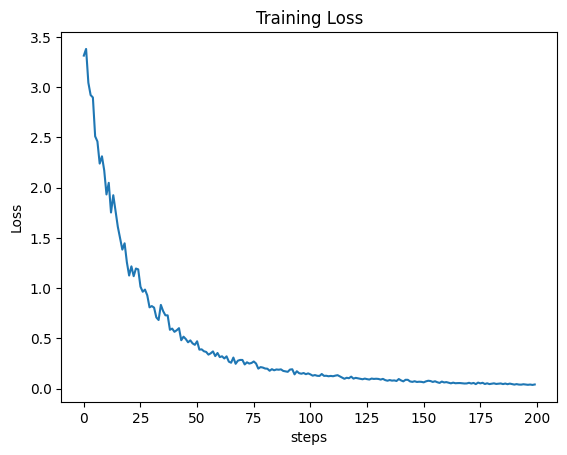

In [1395]:
plt.plot(losses)
plt.xlabel('steps')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [1397]:
# Evaluate the model on the test set and calculate R-squared
model.eval()
with torch.no_grad():
    object_features_test = X_test[:, :27].long()
    bbox_features_test = X_test[:, 27:27+108]
    score_features_test = X_test[:, -27:]

    outputs = model(object_features_test, bbox_features_test, score_features_test)
    # outputs = model(X_test)
    test_predictions = outputs.numpy().flatten()
    test_targets = y_test.numpy().flatten()

# Calculate R-squared
ss_res = np.sum((test_targets - test_predictions) ** 2)
ss_tot = np.sum((test_targets - np.mean(test_targets)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared:.4f}')

# You might also want to calculate Mean Squared Error (MSE)
mse = np.mean((test_targets - test_predictions) ** 2)
print(f'Mean Squared Error: {mse:.4f}')

# And Mean Absolute Error (MAE)
mae = np.mean(np.abs(test_targets - test_predictions))
print(f'Mean Absolute Error: {mae:.4f}')

R-squared: -0.4892
Mean Squared Error: 0.0023
Mean Absolute Error: 0.0382


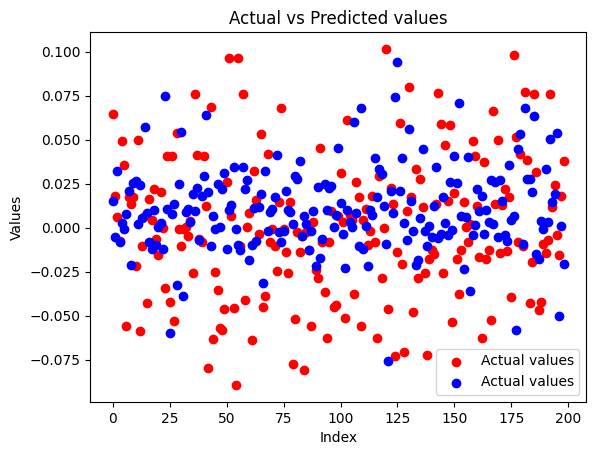

In [1398]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the actual values with scatter plot (y_true)
ax.scatter(range(len(test_targets)), test_targets, color='red', label='Actual values')

# Plot the predicted values with scatter plot (y_pred)
ax.scatter(range(len(y_test)), test_predictions, color='blue', label='Actual values')
# Plot the predicted values with line plot (y_pred)

# ax.plot(range(len(test_predictions)), test_predictions, color='blue', linewidth=2, label='Predicted values')

# Adding labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted values')

# Adding legend
ax.legend()

# Show plot
plt.show()
